In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import integrate
import scipy

In [232]:
N = 50
alpha = 0.05

#Количество проверок
c = 8
alpha /= 8

In [27]:
ksi1 = np.random.random(N)*2 - 1
ksi2 = np.random.random(N)*2 - 1
ksi3 = np.random.random(N)*2 - 1
ksi4 = np.random.random(N)*2 - 1
ksi5 = np.random.random(N)*2 - 1

center = 3*ksi1 - 2*ksi2 + ksi3 + ksi4 - ksi5 
eta = np.random.normal(center, 1.5**2)

In [233]:
def linear_regression_ksi(ksi, ksi1, ksi2, ksi3, ksi4, show = False, number = None):
    Psi_T = np.array([np.zeros(len(ksi)) + 1,ksi1, ksi2, ksi3, ksi4])
    F = np.dot(Psi_T, Psi_T.T)
    F_inv = np.linalg.inv(F)
    beta = np.dot(np.dot(F_inv, Psi_T), ksi.T)
    
    e = ksi - np.dot(Psi_T.T, beta.T)
    RSS = np.dot(e.T, e)
    weird = ksi - np.mean(ksi)
    TSS = np.dot(weird, weird)
    R_2 = 1 - RSS/TSS
    
    if show:
        print("R^2 = ", round(R_2, 3))
        if R_2 >= 0.7:
            print("ξ", number, " связана со всеми остальными и ее можно убрать")
        else:
            print("ξ", number, " значима")

# a) Мультиколлинеарность

## ξ1

In [234]:
linear_regression_ksi(ksi1, ksi2, ksi3, ksi4, ksi5, True, 1)

R^2 =  0.063
ξ 1  значима


## ξ2

In [235]:
linear_regression_ksi(ksi2, ksi1, ksi3, ksi4, ksi5, True, 2)

R^2 =  0.048
ξ 2  значима


## ξ3

In [236]:
linear_regression_ksi(ksi3, ksi2, ksi1, ksi4, ksi5, True, 3)

R^2 =  0.021
ξ 3  значима


## ξ4

In [237]:
linear_regression_ksi(ksi4, ksi2, ksi3, ksi1, ksi5, True, 4)

R^2 =  0.077
ξ 4  значима


## ξ5

In [238]:
linear_regression_ksi(ksi5, ksi2, ksi3, ksi4, ksi1, True, 5)

R^2 =  0.076
ξ 5  значима


# b) Уравление линейной регрессии и значимость коэффициентов

In [239]:
def linear_regression(eta, ksi1, ksi2, ksi3, ksi4, ksi5, n, p):
    Psi_T = np.array([np.zeros(len(eta)) + 1,ksi1, ksi2, ksi3, ksi4, ksi5])
    F = np.dot(Psi_T, Psi_T.T)
    F_inv = np.linalg.inv(F)
    beta = np.dot(np.dot(F_inv, Psi_T), eta.T)
    
    e = eta - np.dot(Psi_T.T, beta.T)
    RSS = np.dot(e.T, e)
    mean = np.mean(eta)
    TSS = np.sum([(etai - mean)**2 for etai in eta])
    R_2 = 1 - RSS/TSS
    delta_r = R_2 * TSS / RSS * (n-p) / (p-1)
    
    delta = []
    for i in range(0, 6):
        delta.append(beta[i]*((n-p)**0.5)/(RSS * F_inv[i, i])**0.5)
        
    return beta, delta, R_2,  delta_r, F_inv, RSS, TSS, e, Psi_T

In [240]:
def possibility(delta, N, p, counter):
    n = N - p
    I = integrate.quad(lambda x: scipy.special.gamma(n/2 + 1/2) / (n*np.pi)**0.5 / scipy.special.gamma(n/2) / (1 + x*x/n)**(n/2+1/2), delta, np.inf)
    p_val = 2*I[0]
    print("p-value =", round(p_val, 10))
    if p_val > alpha:
        print("β", counter, "не значима")
    else:
        print("β", counter, "значима")
    return p_val

## Линейная регрессия:

In [241]:
beta, delta, R_2, delta_R, F_inv, RSS, TSS, e, Psi_T = linear_regression(eta, ksi1, ksi2, ksi3, ksi4, ksi5, N, 6)
p = []
print("η =", np.round(beta, 2), "*", "(1, ξ1, ξ2, ξ3, ξ4, ξ5)")

η = [-0.26  3.01 -2.92  1.78  1.57 -0.3 ] * (1, ξ1, ξ2, ξ3, ξ4, ξ5)


## Значимость коэффициентов:

## β0

In [242]:
p.append(possibility(np.abs(delta[0]), N, 6, 0))

p-value = 0.3777030253
β 0 не значима


## β1

In [243]:
p.append(possibility(np.abs(delta[1]), N, 6, 1))

p-value = 2.894e-07
β 1 значима


## β2

In [244]:
p.append(possibility(np.abs(delta[2]), N, 6, 2))

p-value = 4.3948e-06
β 2 значима


## β3

In [245]:
p.append(possibility(np.abs(delta[3]), N, 6, 3))

p-value = 0.0011217586
β 3 значима


## β4

In [246]:
p.append(possibility(np.abs(delta[4]), N, 6, 4))

p-value = 0.0037084716
β 4 значима


## β5

In [247]:
p.append(possibility(np.abs(delta[5]), N, 6, 5))

p-value = 0.5630659885
β 5 не значима


# c) Коэффициент детерминации и его значимость

## Коэффициент детерминации

In [248]:
print("R =", round(R_2**0.5, 3))

R = 0.822


## Значимость

In [249]:
d1 = 6-1
d2 = N-6
p_value = integrate.quad(lambda x: ((d1*x)**d1 * d2**d2 / (d1*x + d2)**(d1+d2))**0.5 / (x * scipy.special.beta(d1/2, d2/2)), delta_R, np.inf)[0]
print("p-value =", p_value)
if p_value > alpha/2 and p_value < 1-alpha/2:
    print("Регрессия не значима")
else:
    print("Регрессия значима")

p-value = 8.119923414190446e-10
Регрессия значима


# d) Значение в точке и доверительный интервал

In [250]:
Psi_0 = np.array([1, 0, 0, 0, 0, 0])
y0 = np.dot(Psi_0, beta)
print("y0 =", round(y0, 3))

coeff = 0.95
i = 0
while (integrate.quad(lambda x: scipy.special.gamma((N-6)/2 + 1/2) / ((N-6)*np.pi)**0.5 / scipy.special.gamma((N-6)/2) / (1 + x*x/(N-6))**((N-6)/2+1/2), i, +np.inf)[0]) > (1 - coeff)/2:
    i += 0.01

A = 1 + np.dot(np.dot(Psi_0, F_inv), Psi_0.T)

g = i * (A * RSS)**0.5 / (N-6)**0.5

print(round(y0-g, 3), "< η0 <", round(y0+g, 3))

y0 = -0.263
-4.289 < η0 < 3.762


# e) Предположение о независимости

In [251]:
Inv = 0
for i in range (0, len(e)):
    for j in range(i+1, len(e)):
        if e[i] > e[j]:
            Inv += 1
delta = (Inv - N*(N-1)/4) / (N**3/36)
p_value = integrate.quad(lambda x: 1/(2*np.pi)**0.5 * np.exp(-x*x/2), delta, np.inf)[0]
print("p-value =", p_value)
if p_value > alpha:
    print("Нет оснований отвергнуть гипотезу независимости")
else:
    print("Есть везкие основания отвергнуть гипотезу независимости")

p-value = 0.5037340452214429
Нет оснований отвергнуть гипотезу независимости


# f) Предположение о нормальности распределения ошибок

p-value = 0.74776
Нет оснований отвергнуть гипотезу нормальности распределения ошибок


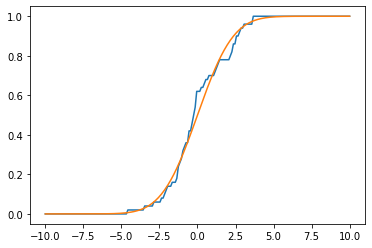

In [252]:
sigma_2 = np.sum([x*x for x in e])/N
x = np.linspace(-10, 10, 200)

l = len(e)
F_est = np.array([np.sum(e < xi)/l for xi in x])

F_normal = [1/(sigma_2**0.5 * (2* np.pi)**0.5) * (integrate.quad(lambda xi: np.exp(-0.5*((xi)/sigma_2**0.5)**2), -np.inf, i)[0]) for i in x]
pyplot.plot(x, F_est)
pyplot.plot(x, F_normal)

delta_est = np.max(np.abs(np.subtract(F_normal, F_est))) * N**0.5

delta_kolmo = []
Count = 50000
for i in range(Count):
    e_new = np.random.normal(0, sigma_2**0.5, N)
    l = len(e_new)
    F_new = np.array([np.sum(e_new < xi)/l for xi in x])
    delta_kolmo.append(np.max(np.abs(np.subtract(F_est, F_new))) * N**0.5)

delta_kolmo.sort()

k = 0
while k < Count and delta_est > delta_kolmo[k]:
    k += 1
p_value = 1 - k/Count

print("p-value =", p_value)
if p_value > alpha:
    print("Нет оснований отвергнуть гипотезу нормальности распределения ошибок")
else:
    print("Есть везкие основания отвергнуть гипотезу нормальности распределения ошибок")

# g) Исследование на выбросы

In [253]:
abse = np.abs(e)
abse.sort()
e_pure = []
eta_pure = []
Psi_pure = []
print("Выбросы:")
sigma = np.median(abse) / 0.675
sigma = 0.8*sigma
for i in range (0, len(e)):
    if(e[i] > 2*sigma or e[i] < -2*sigma):
        print(round(e[i], 3))
    else:
        e_pure.append(e[i])
        eta_pure.append(eta[i])
        Psi_pure.append(Psi_T.T[i])
        
if(len(e_pure) == len(e)):
    print("Выбросов нет")

e_pure = eta_pure - np.dot(Psi_pure, beta.T)
RSS_pure = np.dot(e_pure.T, e_pure)
mean_pure = np.mean(eta_pure)
TSS_pure = np.sum([(etai - mean_pure)**2 for etai in eta_pure])
R_2_pure = 1 - RSS_pure/TSS_pure
print("Было: R^2 =", round(R_2, 3))
print("Стало: R^2 =", round(R_2_pure, 3))

Выбросы:
-4.665
3.613
-3.522
3.033
3.648
Было: R^2 = 0.676
Стало: R^2 = 0.776


# h) Кросс-проверка регрессии

In [254]:
R_cv = []
for i in range (0, len(eta)):
    ksi1_h = np.delete(ksi1, i)
    ksi2_h = np.delete(ksi2, i)
    ksi3_h = np.delete(ksi3, i)
    ksi4_h = np.delete(ksi4, i)
    ksi5_h = np.delete(ksi5, i)
    eta_h = np.delete(eta, i)    
    
    Psi_h_T = np.array([np.zeros(len(eta_h)) + 1,ksi1_h, ksi2_h, ksi3_h, ksi4_h, ksi5_h])
    F_h = np.dot(Psi_h_T, Psi_h_T.T)
    F_h_inv = np.linalg.inv(F_h)
    beta_h = np.dot(np.dot(F_h_inv, Psi_h_T), eta_h.T)
    
    R_cv.append((np.dot(np.array([1, ksi1[i], ksi2[i], ksi3[i], ksi4[i], ksi5[i]]), beta_h) - eta[i])**2)

R_CV = 1 - np.sum(R_cv) / TSS

print("R_CV^2 =", round(R_CV, 3))

R_CV^2 = 0.571


# i) Адекватность регрессии

In [255]:
x_fix = np.array([1, ksi1[0], ksi2[0], ksi3[0], ksi4[0], ksi5[0]])

y = np.random.normal(np.dot(np.array([2, 3, -2, 1, 1, -1]), x_fix), 1.5, 5)

Sigma_hat = 1 / (len(y) - 1) * np.sum([(yi - np.mean(y))**2 for yi in y])

delta = RSS / (N-6) / Sigma_hat

d2 = len(y) - 1
d1 = N-6
p_value = integrate.quad(lambda x: ((d1*x)**d1 * d2**d2 / (d1*x + d2)**(d1+d2))**0.5 / (x * scipy.special.beta(d1/2, d2/2)), delta, np.inf)[0]
print("p-value =", p_value)
if p_value > alpha/2 and p_value < 1-alpha/2:
    print("Модель адекватна")
else:
    print("Модель не адекватна")

p-value = 0.13112655424962283
Модель адекватна


# j) Удаление наименее значимого коэффициента и повторение b) и c)

## Линейная регрессия:

In [256]:
def linear_regression_short(eta, Psi_T, n, p):
    F = np.dot(Psi_T, Psi_T.T)
    F_inv = np.linalg.inv(F)
    beta = np.dot(np.dot(F_inv, Psi_T), eta.T)
    
    e = eta - np.dot(Psi_T.T, beta.T)
    RSS = np.dot(e.T, e)
    mean = np.mean(eta)
    TSS = np.sum([(etai - mean)**2 for etai in eta])
    R_2 = 1 - RSS/TSS
    delta_r = R_2 * TSS / RSS * (n-p) / (p-1)
    
    delta = []
    for i in range(0, 5):
        delta.append(beta[i]*((n-p)**0.5)/(RSS * F_inv[i, i])**0.5)

    return beta, R_2, RSS, TSS, delta, delta_r

In [257]:
def possibility(delta, N, p, counter):
    n = N - p
    I = integrate.quad(lambda x: scipy.special.gamma(n/2 + 1/2) / (n*np.pi)**0.5 / scipy.special.gamma(n/2) / (1 + x*x/n)**(n/2+1/2), delta, np.inf)
    p_val = 2*I[0]
    print("p-value =", round(p_val, 10))
    if p_val > alpha:
        print("β", counter, "не значима")
    else:
        print("β", counter, "значима")

In [258]:
p=np.array(p)
Psi_short = np.array([np.zeros(N) + 1, ksi1, ksi2, ksi3, ksi4, ksi5])
Psi_short = np.delete(Psi_short, p.argmax(), axis = 0)

beta_short, R_2_short, RSS_short, TSS_short, delta_short, delta_R_short = linear_regression_short(eta, Psi_short, N, 5)
print("Было: η =", np.round(beta, 2), "*", "(1, ξ1, ξ2, ξ3, ξ4, ξ5)")
print("Стало: η =", np.round(beta_short, 2), "*", "(1, ξ1, ξ2, ξ3, ξ4)")

Было: η = [-0.26  3.01 -2.92  1.78  1.57 -0.3 ] * (1, ξ1, ξ2, ξ3, ξ4, ξ5)
Стало: η = [-0.26  3.07 -2.92  1.79  1.63] * (1, ξ1, ξ2, ξ3, ξ4)


## Значимость коэффициентов:

## β0

In [259]:
possibility(np.abs(delta_short[0]), N, 5, 0)

p-value = 0.3724568866
β 0 не значима


## β1

In [260]:
possibility(np.abs(delta_short[1]), N, 5, 1)

p-value = 8.77e-08
β 1 значима


## β2

In [261]:
possibility(np.abs(delta_short[2]), N, 5, 2)

p-value = 3.6875e-06
β 2 значима


## β3

In [262]:
possibility(np.abs(delta_short[3]), N, 5, 3)

p-value = 0.0009810333
β 3 значима


## β4

In [263]:
possibility(np.abs(delta_short[4]), N, 5, 4)

p-value = 0.0020798496
β 4 значима


## Коэффициент детерминации и его значимость

## Коэффициент детерминации

In [264]:
print("R^2 =", round(R_2_short**0.5, 3))

R^2 = 0.821


## Значимость

In [265]:
d1 = 5-1
d2 = N-5
p_value_short = integrate.quad(lambda x: ((d1*x)**d1 * d2**d2 / (d1*x + d2)**(d1+d2))**0.5 / (x * scipy.special.beta(d1/2, d2/2)), delta_R_short, np.inf)[0]
print("p-value =", p_value_short)
if p_value_short > alpha/2 and p_value_short < 1-alpha/2:
    print("Регрессия не значима")
else:
    print("Регрессия значима")

p-value = 1.8349610518048828e-10
Регрессия значима


# k) Сравнение уравнений регрессии

In [266]:
def linear_regression_bootstrap(eta, Psi_T, n, p):
    F = np.dot(Psi_T, Psi_T.T)
    F_inv = np.linalg.inv(F)
    beta = np.dot(np.dot(F_inv, Psi_T), eta.T)
    
    e = eta - np.dot(Psi_T.T, beta.T)
    RSS = np.dot(e.T, e)
    mean = np.mean(eta)
    TSS = np.sum([(etai - mean)**2 for etai in eta])
    R_2 = 1 - RSS/TSS
    return R_2

In [267]:
Psi = np.array([np.zeros(N) + 1, ksi1, ksi2, ksi3, ksi4, ksi5])
p=np.array(p)

delta = []
delta_w = R_2 - R_2_short

v = 1000
for i in range (0, v):
    num = np.random.randint(0, N, N)
    Psi_T_i = []
    Psi_T_short_i = []
    eta_i = []
    for j in num:
        Psi_T_i.append(Psi.T[j])
        Psi_T_short_i.append(Psi_short.T[j])
        eta_i.append(eta[j])
    delta.append(linear_regression_bootstrap(np.array(eta_i), np.array(Psi_T_i).T, N, 6) - linear_regression_bootstrap(np.array(eta_i), np.array(Psi_T_short_i). T, N, 5))
    
delta.sort()


k = 0
while k < v and delta_w > delta[k]:
    k += 1
p_value = 1 - k/v

print("p-value =", p_value)
if p_value > alpha:
    print("Нет смысла добалять новый признак")
else:
    print("Есть смысл добавить новый признак")

p-value = 0.643
Нет смысла добалять новый признак
